## APST2 : Projet Model Based Clustering

EL TAHECH Hayat, NKODO Wilfrid, DAVID Romain, SIMON Antoine

## Introduction

Pour réaliser ce projet, nous avons utiliser des données sur les élections présidentielles francaises 2022. Le but est d'effectuer une classification en utilisant les mélanges gaussien. On va donc essayer de voir quelles sont les régions similaires en termes de répartition des votes entre les différents candidats.

In [60]:
# Importation des librairies nécessaires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

## Exploration des données

Dans cette première partie, nous allons essayer de comprendre les données, les nettoyer telles que la suppression des doublons, la gestion des valeurs manquantes. Nous allons également faire quelques visualisations pour explorer les données. 

In [2]:
# Importation des données

data_pres = pd.read_csv('C:/Users/romai/Downloads/02-resultats-par-region.csv')

In [3]:
# Apercu du jeu de données

data_pres

,url,reg_code,reg_code_3,reg_name,num_tour,inscrits_nb,abstention_nb,abstention_pourc,votants_nb,blancs_nb,...,exprimes_nb,exprimes_pourc_inscrits,exprimes_pourc_votants,cand_num_panneau,cand_nom,cand_prenom,cand_civil,cand_nb_voix,cand_rapport_exprim,cand_rapport_inscrits
0,https://www.resultats-elections.interieur.gouv...,1,1,Guadeloupe,1,316023,174592,55.25,141431,2719,...,135085,42.75,95.51,1,ARTHAUD,Nathalie,Mme,1084,0.80,0.34
1,https://www.resultats-elections.interieur.gouv...,1,1,Guadeloupe,1,316023,174592,55.25,141431,2719,...,135085,42.75,95.51,2,ROUSSEL,Fabien,M.,668,0.49,0.21
2,https://www.resultats-elections.interieur.gouv...,1,1,Guadeloupe,1,316023,174592,55.25,141431,2719,...,135085,42.75,95.51,3,MACRON,Emmanuel,M.,18137,13.43,5.74
3,https://www.resultats-elections.interieur.gouv...,1,1,Guadeloupe,1,316023,174592,55.25,141431,2719,...,135085,42.75,95.51,4,LASSALLE,Jean,M.,1033,0.76,0.33
4,https://www.resultats-elections.interieur.gouv...,1,1,Guadeloupe,1,316023,174592,55.25,141431,2719,...,135085,42.75,95.51,5,LE PEN,Marine,Mme,24204,17.92,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,https://www.resultats-elections.interieur.gouv...,94,94,Corse,1,243039,90636,37.29,152403,2521,...,147936,60.87,97.07,8,HIDALGO,Anne,Mme,1589,1.07,0.65
212,https://www.resultats-elections.interieur.gouv...,94,94,Corse,1,243039,90636,37.29,152403,2521,...,147936,60.87,97.07,9,JADOT,Yannick,M.,4801,3.25,1.98
213,https://www.resultats-elections.interieur.gouv...,94,94,Corse,1,243039,90636,37.29,152403,2521,...,147936,60.87,97.07,10,PÉCRESSE,Valérie,Mme,9363,6.33,3.85
214,https://www.resultats-elections.interieur.gouv...,94,94,Corse,1,243039,90636,37.29,152403,2521,...,147936,60.87,97.07,11,POUTOU,Philippe,M.,1374,0.93,0.57


On affiche ci dessous des informations générales sur notre jeu de données afin de mieux le comprendre.

In [4]:
data_pres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url                      216 non-null    object 
 1   reg_code                 216 non-null    int64  
 2   reg_code_3               216 non-null    int64  
 3   reg_name                 216 non-null    object 
 4   num_tour                 216 non-null    int64  
 5   inscrits_nb              216 non-null    int64  
 6   abstention_nb            216 non-null    int64  
 7   abstention_pourc         216 non-null    float64
 8   votants_nb               216 non-null    int64  
 9   blancs_nb                216 non-null    int64  
 10  blancs_pourc_inscrits    216 non-null    float64
 11  blancs_pourc_votants     216 non-null    float64
 12  nuls_nb                  216 non-null    int64  
 13  nuls_pourc_inscrits      216 non-null    float64
 14  nuls_pourc_votants       2

Puis on regarde ensuite si il y a des valeurs manquantes de manière à le nettoyer.

In [5]:
data_pres.isna().sum()

url                        0
reg_code                   0
reg_code_3                 0
reg_name                   0
num_tour                   0
inscrits_nb                0
abstention_nb              0
abstention_pourc           0
votants_nb                 0
blancs_nb                  0
blancs_pourc_inscrits      0
blancs_pourc_votants       0
nuls_nb                    0
nuls_pourc_inscrits        0
nuls_pourc_votants         0
exprimes_nb                0
exprimes_pourc_inscrits    0
exprimes_pourc_votants     0
cand_num_panneau           0
cand_nom                   0
cand_prenom                0
cand_civil                 0
cand_nb_voix               0
cand_rapport_exprim        0
cand_rapport_inscrits      0
dtype: int64

Notre jeu de données ne possède aucune données manquantes. Regardons maintenant si il possède des doublons.

In [6]:
# On vérifier si il y a des doublons
duplicates = data_pres.duplicated()

# Afficher les lignes dupliquées
print(data_pres[duplicates])

Empty DataFrame
Columns: [url, reg_code, reg_code_3, reg_name, num_tour, inscrits_nb, abstention_nb, abstention_pourc, votants_nb, blancs_nb, blancs_pourc_inscrits, blancs_pourc_votants, nuls_nb, nuls_pourc_inscrits, nuls_pourc_votants, exprimes_nb, exprimes_pourc_inscrits, exprimes_pourc_votants, cand_num_panneau, cand_nom, cand_prenom, cand_civil, cand_nb_voix, cand_rapport_exprim, cand_rapport_inscrits]
Index: []

[0 rows x 25 columns]


Il possède également aucun doublons, il est ainsi prétraité. On définit maintenant notre base de données de travail pour la suite, on prend juste les candidats, les régions et le pourcentage de votes obtenus pour chaque candidats qu'on réordonne dans un data frame.

In [7]:
data_t = data_pres.reset_index().pivot(index='reg_name', columns='cand_nom', values='cand_rapport_exprim')
data_t

cand_nom,ARTHAUD,DUPONT-AIGNAN,HIDALGO,JADOT,LASSALLE,LE PEN,MACRON,MÉLENCHON,POUTOU,PÉCRESSE,ROUSSEL,ZEMMOUR
reg_name,,,,,,,,,,,,
Auvergne-Rhône-Alpes,0.55,2.33,1.83,5.31,3.22,22.28,27.75,21.20,0.72,5.15,2.28,7.39
Bourgogne-Franche-Comté,0.71,2.58,1.77,4.02,3.31,27.35,26.31,18.56,0.85,5.12,2.27,7.15
Bretagne,0.66,1.78,2.21,6.19,2.97,19.53,32.79,20.65,1.01,4.70,2.59,4.91
Centre-Val de Loire,0.69,2.36,1.72,4.04,2.87,25.86,28.53,18.68,0.83,5.33,2.50,6.58
Corse,0.31,1.76,1.07,3.25,10.42,28.58,18.11,13.37,0.93,6.33,3.08,12.80
Grand Est,0.67,2.68,1.43,4.01,2.77,29.54,27.28,17.63,0.80,4.33,1.70,7.17
Guadeloupe,0.80,1.56,1.68,1.43,0.76,17.92,13.43,56.16,0.53,2.95,0.49,2.29
Guyane,0.83,2.00,1.49,2.62,1.44,17.66,14.22,50.59,1.29,2.78,0.69,4.39
Hauts-de-France,0.69,1.82,1.34,3.13,2.05,33.35,25.40,18.98,0.69,3.53,3.11,5.90


Nous pouvons voir que nous avons 12 candidats et 18 régions. On va maintenant essayer de visualiser le pourcentage de votes obtenus pour chaque candidats dans les différentes régions.

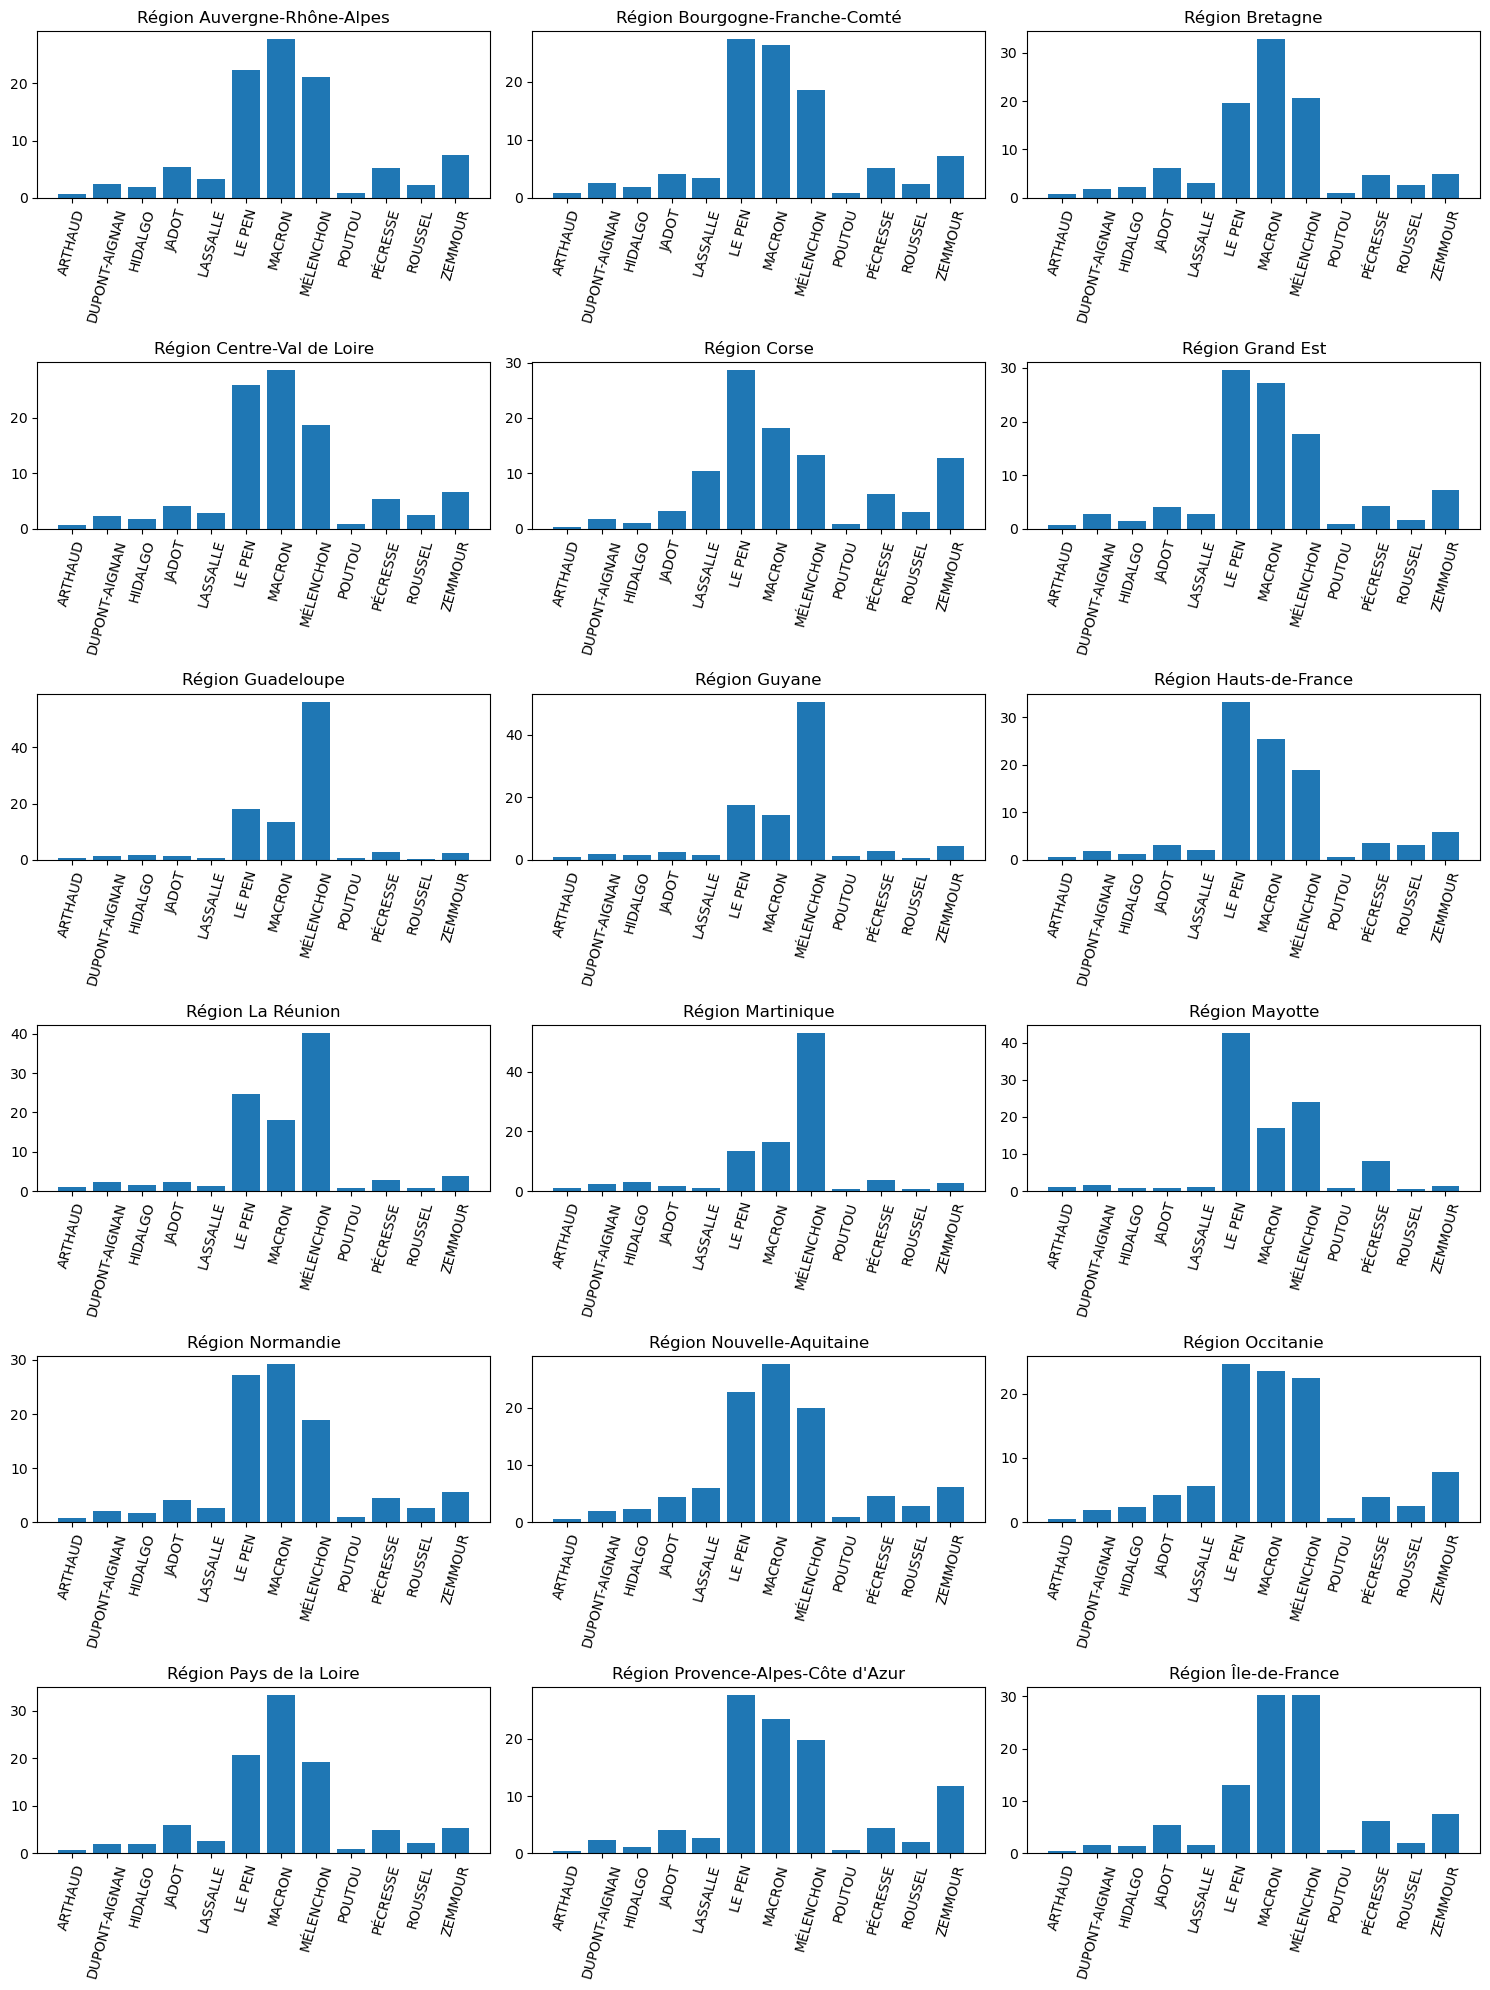

In [27]:
# Création des sous-plots
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))

# Création des barplots
for i,ax in enumerate(axes.flatten()):
    ax.bar(data_t.columns, data_t.iloc[i,:]);
    ax.set_title(str('Région ')+data_t.index[i])
    ax.set_xticklabels(data_t.columns, rotation=75)
    
# Configuration des marges entre les sous-graphiques
fig.subplots_adjust(hspace=1.2)

# Affichage des barplots
plt.tight_layout()
plt.show()

On remarque que pour chaques régions les 3 candidats ayant le plus de pourcentage de votes pour eux sont : Emmanuel MACRON, Marine LE PEN et Jean-Luc MÉLENCHON.

## Modèle de Mélange Gaussien

Dans cette deuxième partie, nous allons effectuer un modèle de mélange gaussien en utilisant la fonction GaussianMixture de la librairie sklearn afin d'obtenir des clusters composé des différentes régions en fonction de la répartition des votes entre les différents candidats. Pour cela, on va tout d'abord chercher le nombres optimal de composantes du mélange gaussien afin d'avoir le meilleur modèle possible. On va déterminer le nombres optimal de composantes du mélange gaussien à l'aide du critère BIC que l'on doit minimiser.

In [142]:
# Normalisation des données
scaler = StandardScaler()
data_gmm_scaled = scaler.fit_transform(data_t)

# On définit le nombre maximum de composantes à tester
n_components_max = 10

# On initialise les listes pour stocker les BIC et les modèles
bic_score = []
gm_models = []

for n in range(1, n_components_max+1):
    gm = GaussianMixture(n_components=n,random_state=42)
    gm.fit(data_gmm_scaled)
    bic_score.append(gm.bic(data_gmm_scaled))
    gm_models.append(gm)



On trace maintenant le BIC en fonction du nombre de composantes du mélange gaussien afin de déterminer le plus petit score BIC et le nombre de composantes associés que l'on gardera pour notre modèle final.

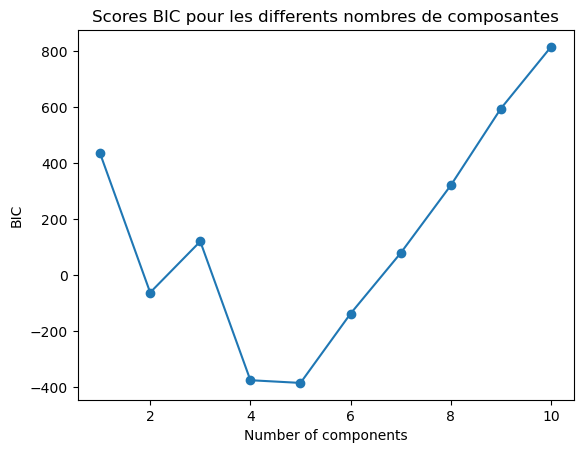

In [143]:
n_components = range(1,11)
plt.plot(n_components, bic_score, marker='o')
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.title('Scores BIC pour les differents nombres de composantes')
plt.show()

In [146]:
# Code permettant d'obtenir le modèle avec le BIC le plus bas et le nombre de composantes associés

best_model_idx = np.argmin(bic_score)
best_gm_model = gm_models[best_model_idx]
best_n_components = best_gm_model.n_components
print('Le meilleur modèle est obtenue avec score BIC de : ',bic_score[best_model_idx])
print('Le nombre optimal de composante pour le mélange gaussien est donc: ',best_n_components)

Le meilleur modèle est obtenue avec score BIC de :  -384.29650523869736
Le nombre optimal de composante pour le mélange gaussien est donc:  5


On détermine maintenant les différents clusters avec le meilleur modèle obtenu.

In [93]:
best_gm_model = gm_models[best_model_idx]
clusters = best_gm_model.predict(data_gmm_scaled)
data_t['clusters']=clusters

Nous allons effectuer une analyse en composante principale afin de visualiser les données dans un espace réduit et observer les résultats obtenues ci-dessus.

In [94]:
# On détermine le nombres de composantes de notre ACP à l'aide pourcentage de variance expliquée par chaque composante 
# principale 

pca = PCA()
data_gmm_pca = pca.fit_transform(data_gmm_scaled)

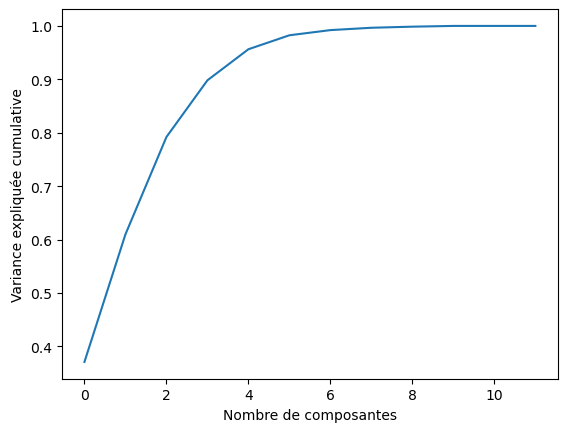

array([0.37099986, 0.60982311, 0.7920479 ])

In [173]:
# On trace le plot du pourcentage de variance expliquée par chaque composante principale afin de déterminer le nombre de 
# composantes optimal pour notre ACP

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulative')
plt.show()
np.cumsum(pca1.explained_variance_ratio_)

La règle dit qu'il faut conserver les composantes qui expliquent au moins 70% de la variance totale, ainsi on décide de garder 3 composantes principales.

In [102]:
# ACP avec 3 composantes principales

pca = PCA(n_components=3)
data_gmm_pca = pca.fit_transform(data_gmm_scaled)
pca_df = pd.DataFrame(data=data_gmm_pca, columns=['PCA 1', 'PCA 2','PCA 3'])
pca_df.index = data_t.index
pca_df['cluster'] = data_t['clusters']

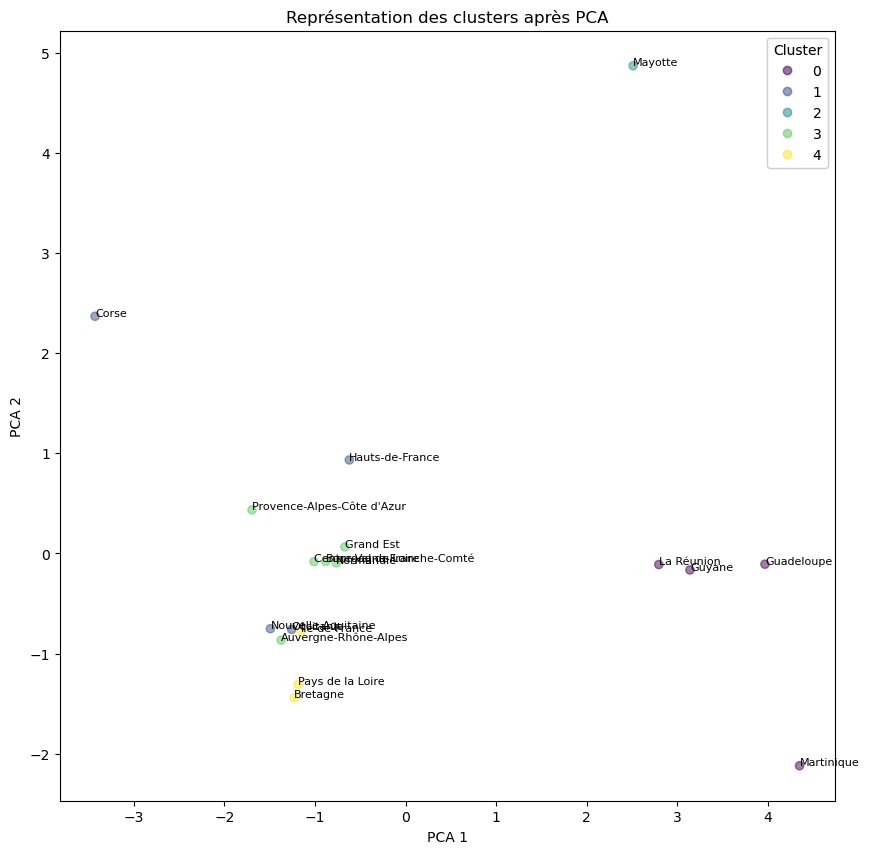

In [106]:
# Visualisation des résultats

fig, ax = plt.subplots(figsize=(10,10))
scatter = ax.scatter(pca_df['PCA 1'], pca_df['PCA 2'], c=pca_df['cluster'], cmap='viridis', alpha=0.5)

for i, txt in enumerate(pca_df.index):
    ax.annotate(txt, (pca_df['PCA 1'][i], pca_df['PCA 2'][i]), fontsize=8)

legend = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Cluster")
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_title('Représentation des clusters après PCA')
ax.add_artist(legend)
plt.show()

In [120]:
print('Le cluster 1 est composé des régions suivantes : ', pca_df.index[pca_df['cluster']==0])
print('Le cluster 2 est composé des régions suivantes : ', pca_df.index[pca_df['cluster']==1])
print('Le cluster 3 est composé des régions suivantes : ', pca_df.index[pca_df['cluster']==2])
print('Le cluster 4 est composé des régions suivantes : ', pca_df.index[pca_df['cluster']==3])
print('Le cluster 5 est composé des régions suivantes : ', pca_df.index[pca_df['cluster']==4])

Le cluster 1 est composé des régions suivantes :  Index(['Guadeloupe', 'Guyane', 'La Réunion', 'Martinique'], dtype='object', name='reg_name')
Le cluster 2 est composé des régions suivantes :  Index(['Corse', 'Hauts-de-France', 'Nouvelle-Aquitaine', 'Occitanie'], dtype='object', name='reg_name')
Le cluster 3 est composé des régions suivantes :  Index(['Mayotte'], dtype='object', name='reg_name')
Le cluster 4 est composé des régions suivantes :  Index(['Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté',
       'Centre-Val de Loire', 'Grand Est', 'Normandie',
       'Provence-Alpes-Côte d'Azur'],
      dtype='object', name='reg_name')
Le cluster 5 est composé des régions suivantes :  Index(['Bretagne', 'Pays de la Loire', 'Île-de-France'], dtype='object', name='reg_name')


On ne voit pas grand chose sur le graphique mise à part que les régions d'outre mer sont dans le même cluster avec des votes en grande majorités pour Jean-Luc Mélenchon hors Mayotte qui compose à elle seul son cluster avec des votes en grande majorités pour Marine Le Pen puis pour Jean-Luc Mélenchon . Essayons de faire la même chose en enlevant les régions Outre-Mer pour voir si on obtient des clusters similaires sur la France Métropolitaine.

In [124]:
# On enlève les régions outre-mer de notre jeu de données

data_so = data_t.copy()
data_so = data_so.drop(['Guadeloupe', 'La Réunion', 'Martinique', 'Guyane', 'Mayotte'],axis=0)

On choisit 3 composantes car on avait choisit 5 composantes sur le modèle ci-dessus et depuis on a enlevé les régions de 2 de ses 5 groupes obtenues.

In [194]:
# Normalisation des données
scaler = StandardScaler()
data_gmm_scaled1 = scaler.fit_transform(data_so.iloc[:,0:12])

# On applique la fonction GaussianMixture aux données
gm2 = GaussianMixture(n_components=3)
gm2.fit(data_gmm_scaled1)
clusters_so = gm2.predict(data_gmm_scaled1)
data_so['clusters']=clusters_so

Nous allons effectuer comme tout à l'heure une analyse en composante principale afin de visualiser les données dans un espace réduit et observer les résultats obtenues ci-dessus.

In [195]:
# On détermine le nombres de composantes de notre ACP à l'aide pourcentage de variance expliquée par chaque composante 
# principale 

pca1 = PCA()
data_gmm_pca1 = pca1.fit_transform(data_gmm_scaled1)

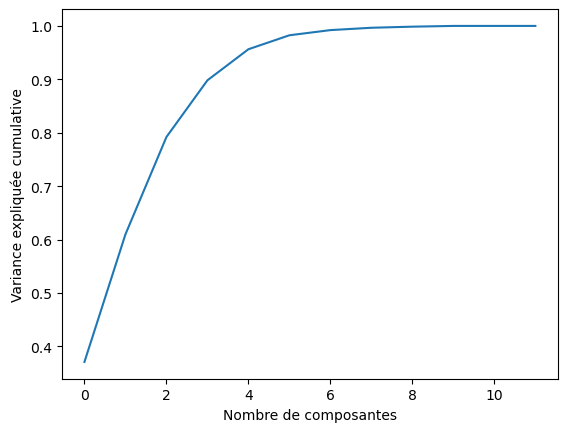

array([0.37099986, 0.60982311, 0.7920479 , 0.89818127, 0.95635755,
       0.98249785, 0.9921685 , 0.99656229, 0.99860832, 0.9999979 ,
       0.99999999, 1.        ])

In [196]:
# On trace le plot du pourcentage de variance expliquée par chaque composante principale afin de déterminer le nombre de 
# composantes optimal pour notre ACP

plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulative')
plt.show()
np.cumsum(pca1.explained_variance_ratio_)

On conserve les composantes qui expliquent au moins 70% de la variance totale, ainsi on décide de garder 3 composantes principales.

In [197]:
pca1 = PCA(n_components=3)
data_gmm_pca1 = pca.fit_transform(data_gmm_scaled1)

In [198]:
# ACP avec 3 composantes principales

pca1 = PCA(n_components=3)
data_gmm_pca1 = pca1.fit_transform(data_gmm_scaled1)
pca_df1 = pd.DataFrame(data=data_gmm_pca1, columns=['PCA 1', 'PCA 2','PCA 3'])
pca_df1.index = data_so.index
pca_df1['cluster'] = data_so['clusters']

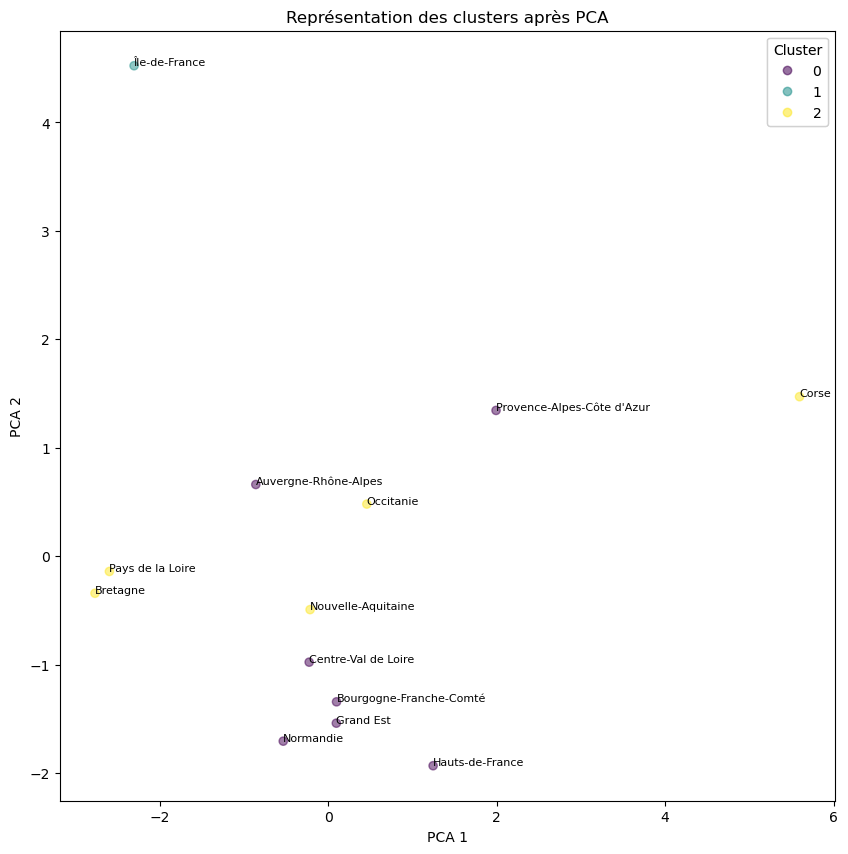

In [199]:
# Visualisation des résultats

fig, ax = plt.subplots(figsize=(10,10))
scatter = ax.scatter(pca_df1['PCA 1'], pca_df1['PCA 2'], c=pca_df1['cluster'], cmap='viridis', alpha=0.5)

for i, txt in enumerate(pca_df1.index):
    ax.annotate(txt, (pca_df1['PCA 1'][i], pca_df1['PCA 2'][i]), fontsize=8)

legend = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Cluster")
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_title('Représentation des clusters après PCA')
ax.add_artist(legend)
plt.show()

In [200]:
print('Le cluster 1 est composé des régions suivantes : ', pca_df1.index[pca_df1['cluster']==0])
print('Le cluster 2 est composé des régions suivantes : ', pca_df1.index[pca_df1['cluster']==1])
print('Le cluster 3 est composé des régions suivantes : ', pca_df1.index[pca_df1['cluster']==2])

Le cluster 1 est composé des régions suivantes :  Index(['Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté',
       'Centre-Val de Loire', 'Grand Est', 'Hauts-de-France', 'Normandie',
       'Provence-Alpes-Côte d'Azur'],
      dtype='object', name='reg_name')
Le cluster 2 est composé des régions suivantes :  Index(['Île-de-France'], dtype='object', name='reg_name')
Le cluster 3 est composé des régions suivantes :  Index(['Bretagne', 'Corse', 'Nouvelle-Aquitaine', 'Occitanie',
       'Pays de la Loire'],
      dtype='object', name='reg_name')


On observe ici des clusters différents par rapport aux clusters obtenues pour le modèle avec toutes les régions même si il y a des régions qui se retrouvent dans le même cluster. 

## Conclusion

En conclusion, les régions outre-mer hormis Mayotte sont similaires avec des votes en grande majorités pour Jean-Luc Mélenchon. La région Mayotte quant à elle est isolée avec des votes en grande majorités pour Marine Le Pen puis pour Jean-Luc Mélenchon. D'après le premier modèle, les régions Pays de La Loire, Bretagne et Ile-de-France sont équivalentes en termes des votes avec pour la plupart une tendance de vote pour Emmanuel Macron. Même si dans le deuxième modèle la région Ile-de-France se retrouve seul dans un cluster car il y a une égalité entre Emmanuel Macron et Jean-Luc Mélenchon. On a également dans le premier modèle un cluster qui regroupe les régions suivantes : Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté, Centre-Val de Loire, Grand Est, Normandie, Provence-Alpes-Côte d'Azur avec une tendance de vote égale pour les candidats : Marine Le Pen, Emmanuel Macron et Jean-Luc Mélenchon. Dans le deuxième modèle, on les retrouve dans le même cluster. Enfin, on a cluster qui regroupe les régions suivantes : Corse, Hauts-de-France, Nouvelle-Aquitaine, Occitanie avec une majorité de vote pour Marine Le Pen à part pour la région Nouvelle-Aquitaine même si il a eu pas mal de vote pour elle.